Мини-анализ данных о рекламных объявлениях!Построим график распределения числа показов, посчитаем СTR, CPC и CR объявлений,визуализируем CTR и СPC для определенных пользователей. 

**Описание данных**<br>
ad_id – идентификатор объявления (рекламы)<br>
xyz_campaign_id – идентификатор рекламной кампании в базе компании X<br>
fb_campaign_id – идентификатор кампании в Facebook<br>
age – возрастная группа, которой показывалась реклама<br>
gender – пол тех, кому показывалась реклама<br>
interest –код, указывающий категорию, к которой относится интерес пользователя (соответствие число – интерес)<br>
impressions – число показов<br>
clicks – число кликов<br>
spent – сумма, которую компания потратила на показ объявления <br>
total_conversion – количество людей, которые заинтересовались продуктом после просмотра рекламы<br>
approved_conversion – количество людей, которые купили продукт после просмотра рекламы<br>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as ss

In [3]:
data = pd.read_csv('https://stepik.org/media/attachments/lesson/384453/conversion.csv')
data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [5]:
# Сколько уникальных рекламных кампаний было проведено?

data['xyz_campaign_id'].nunique()

3

In [6]:
data.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [7]:
data['age'].value_counts()

30-34    426
45-49    259
35-39    248
40-44    210
Name: age, dtype: int64

In [8]:
# Построим график распределения числа показов (Impressions – сколько раз пользователи увидели данное объявление) 
# для каждой рекламной кампании в Facebook, прологарифмировав значения

data1 = np.log(data.groupby('fb_campaign_id').agg({'Impressions':'sum'}))
data1

,Impressions
fb_campaign_id,
103916,8.902456
103917,9.790375
103920,6.541030
103928,9.035034
103929,7.557473
...,...
179977,13.937527
179978,13.365386
179979,11.928546


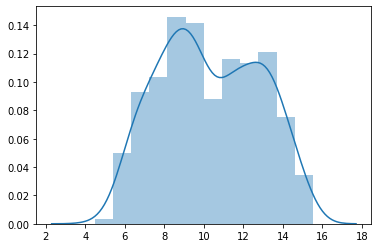

In [9]:
sns.distplot(data1)

In [10]:
# Посчитаем CTR объявлений(отношение числа кликов к количеству показов)

data['ctr'] = data['Clicks'] / data['Impressions']
data

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,ctr
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1,0.000136
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0,0.000112
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0,0.000000
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0,0.000235
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1,0.000242
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2,0.000223
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0,0.000188
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0,0.000185
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710000,8,2,0.000171


In [11]:
# Найдем объявление с наибольшим CTR:

data['ctr'].idxmax()

150

In [12]:
data.iloc[data['ctr'].idxmax()].ad_id

738637

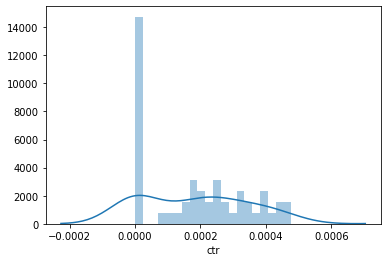

In [13]:
# Визуализируем CTR для 916 кампании:

sns.distplot(data.query("xyz_campaign_id == 916")['ctr'],bins = 20)

In [14]:
# Посчитаем CPC ( стоимость за клик пользователя по объявлению)

data['cpc'] = data['Spent'] / data['Clicks']

In [17]:
# Межквартильный размах, округленный до двух знаков после точки

ss.stats.iqr(data['cpc'], nan_policy='omit').round(2)

0.25

In [18]:
round(data['cpc'].describe()[6] - data['cpc'].describe()[4],2)

0.25

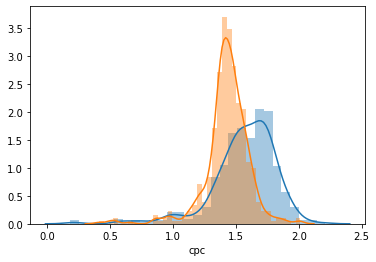

In [19]:
# Визуализируем CPC с разбивкой по полу пользователей, которым были показаны объявления

sns.distplot(data.query("gender == 'M'")['cpc'])
sns.distplot(data.query("gender == 'F'")['cpc'])

In [20]:
# Посчитаем конверсию из клика в покупку(отношение числа пользователей, совершивших целевое действие на 
# определенном этапе, к общему числу тех, кто дошел до данного этапа.)

data['cr'] = 100 * data['Approved_Conversion'] / data['Clicks'] 
data

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,ctr,cpc,cr
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1,0.000136,1.430000,100.000000
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0,0.000112,0.910000,0.000000
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0,0.000000,NaN,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0,0.000235,1.250000,0.000000
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1,0.000242,1.290000,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2,0.000223,1.421389,0.793651
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0,0.000188,1.449000,0.000000
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0,0.000185,1.438929,0.000000
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710000,8,2,0.000171,1.471926,1.481481


In [31]:
# Конверсия для объявления 1121814 в процентах

data[data['ad_id'] == 1121814].cr.round(2).values[0]

3.09